In [88]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sn

In [92]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()
x_train = x_train/255
x_test = x_test/255
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [93]:
#neural network implementation
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])


In [94]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=["accuracy"])
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4720 - accuracy: 0.8778
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3041 - accuracy: 0.9144
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2833 - accuracy: 0.9214
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2731 - accuracy: 0.9242
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2667 - accuracy: 0.9262


In [95]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2694 - accuracy: 0.9242


[0.26938357949256897, 0.9241999983787537]

In [96]:
y_predicted = model.predict(x_test_flattened)


313/313 [==============================] - 1s 2ms/step


In [97]:
np.argmax(y_predicted[9])
# plt.matshow(x_test[9])
# y_predicted.shape
y_test[:10]


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [98]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(95.72222222222221, 0.5, 'truth')

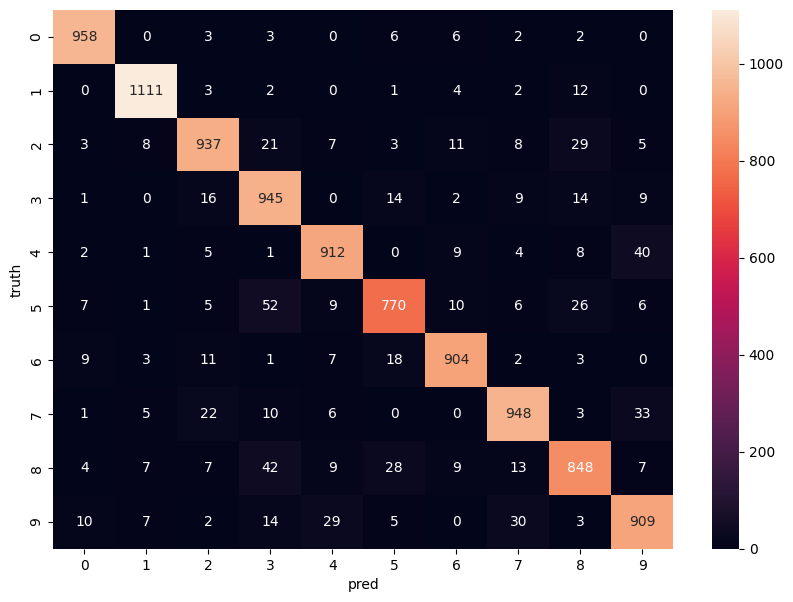

In [99]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("pred")
plt.ylabel("truth")
